## Raster Data Processing

## Raster Operations using GDAL 
GDAL Library allows you to read and write both vector and raster data.

https://rgis.unm.edu/rgis6/

### Using GDAL to load and query rasters 

In [22]:
from osgeo import gdal
nmtif = gdal.Open("data/PWT-294_S_4_FMN_1-001_160_geo_tif/PWT-294_S_4_FMN_1-001_160_geo.tif")
nmtif2 = gdal.Open("data/cdl_30m_r_nm_2008_utm13_tif/cdl_30m_r_nm_2008_utm13.tif")
print(nmtif.GetMetadata())

{'AREA_OR_POINT': 'Area', 'DataType': 'Generic'}


In [24]:
nmtif2.GetMetadata()

{'AREA_OR_POINT': 'Area',
 'TIFFTAG_RESOLUTIONUNIT': '2 (pixels/inch)',
 'TIFFTAG_SOFTWARE': 'IMAGINE TIFF Support\nCopyright 1991 - 1999 by ERDAS, Inc. All Rights Reserved\n@(#)$RCSfile: etif.c $ $Revision: 1.10.1.9.1.9.2.11 $ $Date: 2004/09/15 18:42:01EDT $',
 'TIFFTAG_XRESOLUTION': '1',
 'TIFFTAG_YRESOLUTION': '1'}

In [12]:
nmtif.GetProjection() # Get the projection of the image

'PROJCS["NAD83 / UTM zone 13N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26913"]]'

In [14]:
# we may change the projection 
from osgeo import osr
p = osr.SpatialReference()
p.ImportFromEPSG(26913)
nmtif.SetProjection(p.ExportToWkt())
nmtif.GetProjection()

'PROJCS["NAD83 / UTM zone 13N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26913"]]'

In [16]:
geoTiffDriver="GTiff"
driver = gdal.GetDriverByName(geoTiffDriver)
out = driver.CreateCopy("data/copy.tif",nmtif,strict=0)

NOTE: A colour raster dataset has three bands - red, green and blue. You can get each of the bands individually using the following code: 

In [32]:
nmtif.RasterCount

1

In [34]:
band = nmtif.GetRasterBand(1)

In [42]:
values = band.ReadAsArray()
values

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [49]:
# getting the description of the band 
band.GetDescription()

''

In [51]:
band.SetDescription('The first band - Green')

In [53]:
band.GetDescription()

'The first band - Green'

## Loading / Displaying a raster data in notebook

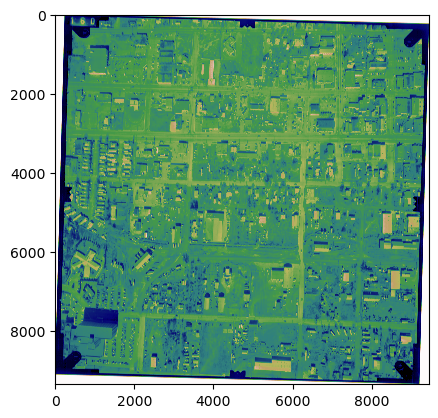

In [72]:
import numpy as np 
from matplotlib.pyplot import imshow 
%matplotlib inline

data_array = nmtif.ReadAsArray()
x = np.array(data_array)
# x.shape ---> 9344, 9441
w,h = 9344, 9441
image = x.reshape(x.shape[0],x.shape[1])
imshow(image, cmap='gist_earth')

## Using GDAL to create rasters 
Note: A raster is an array of values. So to create one, you start by creating an array

In [88]:
a_raster=np.array(
    [ 
     [10,10,1,10,10,10,10], 
     [1,1,1,50,10,10,50], 
     [10,1,1,51,10,10,50], 
     [1,1,1,1,50,10,50]
    ])

Now we have the raster, we will need to set some basic properties.

In [96]:
coord = (-106.629773,35.105389)
w,h = 10 ,10
name = "data/BigI.tif"

Next step is to create the raster by combining the data and properties. 

In [98]:
d = gdal.GetDriverByName("GTiff")
output = d.Create(name, a_raster.shape[1],a_raster.shape[0], 1, gdal.GDT_UInt32)
output.SetGeoTransform((coord[0],w,0,coord[1],0,h))
output.GetRasterBand(1).WriteArray(a_raster)
outsr = osr.SpatialReference()
outsr.ImportFromEPSG(4326)
output.SetProjection(outsr.ExportToWkt())
output.FlushCache()

In [100]:
output.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

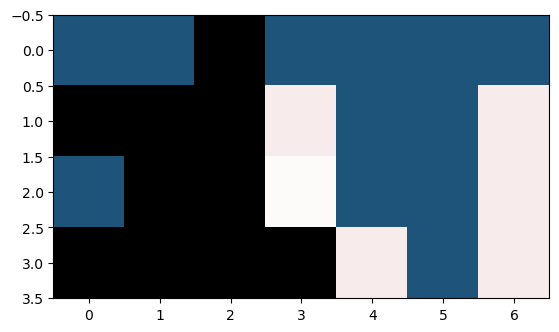

In [106]:
imshow(a_raster,cmap='gist_earth')

## Raster Operations using PostgreSQL
- Learning how to load and query rasters using a spatial database - PostgreSQL

### Loading rasters into PostgreSQL
PostgreSQL comes with raster2pgsql binary that can be executed from the commandline to load TIF into an existing postgreSQL database

In [115]:
!raster2pgsql -I -C -s 4326 data/BigI.tif public.bigi | psql -U postgres -d pythonspatial

Processing 1/1: data/BigI.tif
Warning 1: BigI.tif: TIFFReadDirectory:Bogus "StripByteCounts" field, ignoring and calculating from imagelength
Warning 1: PROJ: proj_create_from_database: /opt/anaconda3/share/proj/proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.
BEGIN
CREATE TABLE
INSERT 0 1
CREATE INDEX
ANALYZE
NOTICE:  Adding SRID constraint
NOTICE:  Adding scale-X constraint
NOTICE:  Adding scale-Y constraint
NOTICE:  Adding blocksize-X constraint
NOTICE:  Adding blocksize-Y constraint
NOTICE:  Adding alignment constraint
NOTICE:  Adding number of bands constraint
NOTICE:  Adding pixel type constraint
NOTICE:  Adding nodata value constraint
NOTICE:  Adding out-of-database constraint
NOTICE:  Adding maximum extent constraint
 addrasterconstraints 
----------------------
 t
(1 row)

COMMIT


Now we have out tif file / data stored in a PostgreSQL 

### Performing queries on rasters using PostgreSQL
With a raster loaded into PostgreSQL, you can query it with Python. The python library for working with PostgreSQL is psycopg2.

In [120]:
import psycopg2
connection = psycopg2.connect(database='pythonspatial', user='postgres')
cursor = connection.cursor()

In [124]:
cursor.execute("SELECT * FROM bigi")
cursor.fetchall()

[(1,
  '010000010000000000000024400000000000002440D8B969334EA85AC0D82D02637D8D414000000000000000000000000000000000E61000000700040008000000000A0000000A000000010000000A0000000A0000000A0000000A000000010000000100000001000000320000000A0000000A000000320000000A0000000100000001000000330000000A0000000A0000003200000001000000010000000100000001000000320000000A00000032000000')]

### Querying raster metadata 
Using PostgreSQL, you can perform various queries on your data. 

In [131]:
# query the basic text summary 
cursor.execute('SELECT ST_Summary(rast) FROM bigi;')
cursor.fetchall()

[('Raster of 7x4 pixels has 1 band and extent of BOX(-106.629773 35.105389,-36.629773 75.105389)\n    band 1 of pixtype 32BUI is in-db with no NODATA value',)]

Passing out the individual pieces of information from ST_Summary would be difficult. You can retrieve this information in a more machine readable 
format using the ST_Metadata

In [136]:
cursor.execute("SELECT ST_Metadata(rast) from bigi")
cursor.fetchall()

[('(-106.629773,35.105389,7,4,10,10,0,0,4326,1)',)]

You can query for specific and individual attributes of the raster. To get the raster as a single polygon - instead of the two-point box described 
in the summary - you can use the following code: 

In [139]:
cursor.execute("select ST_AsText(ST_Envelope(rast)) from bigi;")
cursor.fetchall()

[('POLYGON((-106.629773 75.105389,-36.629773 75.105389,-36.629773 35.105389,-106.629773 35.105389,-106.629773 75.105389))',)]

In [141]:
# querying the height and width of the raster 
cursor.execute("SELECT st_height(rast), st_width(rast) from bigi;")
cursor.fetchall()

[(4, 7)]

In [145]:
# querying the pixel size 
cursor.execute("SELECT ST_PixelWidth(rast), ST_PixelHeight(rast) from bigi;")
cursor.fetchall()

[(10.0, 10.0)]

In [149]:
# Query for histogram of the values in the raster
cursor.execute("SELECT ST_Histogram(rast) from bigi")
cursor.fetchall()

[('(1,9.333333333333334,10,0.35714285714285715)',),
 ('(9.333333333333334,17.666666666666668,12,0.42857142857142855)',),
 ('(17.666666666666668,26,0,0)',),
 ('(26,34.333333333333336,0,0)',),
 ('(34.333333333333336,42.66666666666667,0,0)',),
 ('(42.66666666666667,51.00000000000001,6,0.21428571428571427)',)]

### Queries returning geometry
The previous queries returned basic information about the raster and returned collections with data. In this section we 
will look at functions that return geometries from queries. 

A raster is comprised of a matrix of cells and values. These cells become georeferenced pixels in our raster data. Using PostgreSQL you can query your raster data for a specific cell and get the polygon representation of that cell back

In [158]:
cursor.execute("select rid, ST_asText(ST_PixelAsPolygon(rast,7,2)) from bigi;")
cursor.fetchall()

[(1,
  'POLYGON((-46.629773 45.105389,-36.629773 45.105389,-36.629773 55.105389,-46.629773 55.105389,-46.629773 45.105389))')]

Using ST_PixelAsPoints and ST_PixelAsCentroids, you can retrieve a point for every pixel in a raster dataset

In [161]:
cursor.execute("SELECT x,y,val, ST_AsText(geom) FROM (SELECT (ST_PixelAsPoints(rast,1)).* from bigi) as foo;")
cursor.fetchall()

[(1, 1, 10.0, 'POINT(-106.629773 35.105389)'),
 (2, 1, 10.0, 'POINT(-96.629773 35.105389)'),
 (3, 1, 1.0, 'POINT(-86.629773 35.105389)'),
 (4, 1, 10.0, 'POINT(-76.629773 35.105389)'),
 (5, 1, 10.0, 'POINT(-66.629773 35.105389)'),
 (6, 1, 10.0, 'POINT(-56.629773 35.105389)'),
 (7, 1, 10.0, 'POINT(-46.629773 35.105389)'),
 (1, 2, 1.0, 'POINT(-106.629773 45.105389)'),
 (2, 2, 1.0, 'POINT(-96.629773 45.105389)'),
 (3, 2, 1.0, 'POINT(-86.629773 45.105389)'),
 (4, 2, 50.0, 'POINT(-76.629773 45.105389)'),
 (5, 2, 10.0, 'POINT(-66.629773 45.105389)'),
 (6, 2, 10.0, 'POINT(-56.629773 45.105389)'),
 (7, 2, 50.0, 'POINT(-46.629773 45.105389)'),
 (1, 3, 10.0, 'POINT(-106.629773 55.105389)'),
 (2, 3, 1.0, 'POINT(-96.629773 55.105389)'),
 (3, 3, 1.0, 'POINT(-86.629773 55.105389)'),
 (4, 3, 51.0, 'POINT(-76.629773 55.105389)'),
 (5, 3, 10.0, 'POINT(-66.629773 55.105389)'),
 (6, 3, 10.0, 'POINT(-56.629773 55.105389)'),
 (7, 3, 50.0, 'POINT(-46.629773 55.105389)'),
 (1, 4, 1.0, 'POINT(-106.629773 65.10

### Queries returning values
This section shows how to query your raster dataset for values 

In [169]:
cursor.execute("SELECT ST_Value(rast,4,3) from bigi;")
cursor.fetchall()

[(51.0,)]

If you want to search for alll pixels with a given values, you can use ST_PixelOfValue, as follows: 

In [174]:
cursor.execute("SELECT ST_PixelOfValue(rast,1,50) from bigi;")
cursor.fetchall()

[('(4,2)',), ('(5,4)',), ('(7,2)',), ('(7,3)',), ('(7,4)',)]

In [176]:
## summarize the occurance of every value in the raster, you can query using ST_ValueCount
cursor.execute("SELECT ST_ValueCount(rast) from bigi;")
cursor.fetchall()

[('(10,12)',), ('(1,10)',), ('(50,5)',), ('(51,1)',)]

In [178]:
## return all values in the raster data 
cursor.execute("select ST_DumpValues(rast,1) from bigi;")
cursor.fetchall()

[([[10.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0],
   [1.0, 1.0, 1.0, 50.0, 10.0, 10.0, 50.0],
   [10.0, 1.0, 1.0, 51.0, 10.0, 10.0, 50.0],
   [1.0, 1.0, 1.0, 1.0, 50.0, 10.0, 50.0]],)]

Using ST_NearestValue, you can pass a point and get the closest pixel value to that point.

In [184]:
cursor.execute("SELECT ST_NearestValue(rast,(SELECT ST_SetSRID(ST_MakePoint(-71.629773,60.105389),4326))) from bigi")
cursor.fetchall()

[(51.0,)]

To retrieve more than one value near a given point, you can use ST_Neighbourhood

In [209]:
#cursor.execute("SELECT ST_Neighborhood(rast,(SELECT ST_SetSRID(ST_MakePoint(-71.629773,60.105389),4326))) from bigi")
#cursor.fetchall()


## Summary: 
In this section, we learned how to use GDAL and PostgreSQL to work with raster data